In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)
import numpy as np
import pandas as pd

rng = np.random.default_rng()

## Example: incidence

Let's build a model of lung cancer incidence,
based loosely on the results of [Tammemagi et al 2011](https://doi.org/10.1093/jnci/djr173).
Suppose we have a study of smokers aged 50-80 years old,
for whom we find out (a) their age,
(b) how many "pack-years" did they smoke during their life (which ranges from 0 to 250 but mostly less than 50),
and (c) whether they develop lung cancer over the 10-year study.
The overall cancer rate is about 7% (*tangential note:* it is about 30x lower in non-smokers).
Suppose that the probability of developing lung cancer
of someone of age $a$ and a total number of pack-years smoked $s$ is
$$\begin{aligned}
    p(a, s) = \frac{1}{1 + \exp(-(-4.1 + .02 a + .01 s))} .
\end{aligned}$$
Incidence goes up with age and pack-years.

Here is a visual depiction of the model:

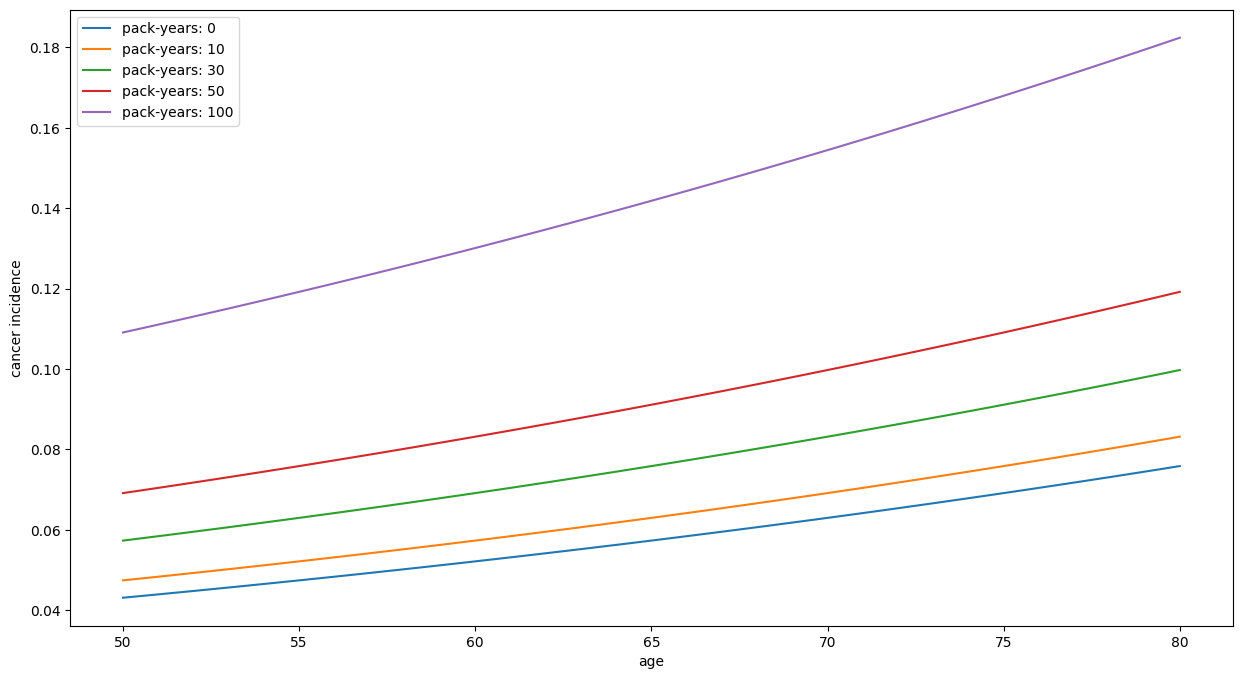

In [3]:
aa = np.linspace(50, 80, 101)
for s in [0, 10, 30, 50, 100]:
    plt.plot(aa, 1/(1 + np.exp(-(-4.1 + .02 * aa + .01 * s))), label=f"pack-years: {s}")
plt.xlabel("age"); plt.ylabel("cancer incidence")
plt.legend();

The plan:

1. Simulate 10,000 data points (people) from this model.
2. Fit the model.
3. See how close we get to the true parameters.

**(1)** First, pick distributions for *age* and *pack-years*:

In [ ]:
n = 10_000
age = # TODO
pack_years = # TODO

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.hist(age, bins=pretty(age, 40))
ax0.set_xlabel("age (years)"); ax0.set_ylabel("frequency")
ax1.hist(pack_years, bins=pretty(pack_years, 40))
ax1.set_xlabel("pack-years smoked"); ax1.set_ylabel("frequency");

The joint distribution:

In [ ]:
plt.scatter(age, pack_years, s=1)
plt.xlabel("age (years)"); plt.ylabel("pack-years smoked");

**(2)** Now, use the formula above and `rng.binomial()`
to simulate for each person whether they develop cancer
based on age and years smoked:

In [ ]:
# define `cancer`: a vector of length 10_000,
# with cancer[i] = 1 if the i-th person has cancer, and = 0 otherwise

In [ ]:
plt.scatter(theta, cancer + rng.uniform(low=-.05, high=.05, size=n), s=1);

**(3)** Now, fit the model, using [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression):

In [ ]:
from sklearn.linear_model import LogisticRegression
# here define `lfit` to be a fitted LogisticRegression object

Here's how good the fit is!

In [ ]:
aa = np.linspace(50, 80, 101)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for s, c in zip([0, 10, 30, 50, 100], colors):
    plt.plot(aa, 1/(1 + np.exp(-(-4.1 + .02 * aa + .01 * s))), label=f"pack-years: {s}", c=c)
    plt.plot(aa, lfit.predict_proba(np.vstack([aa, np.repeat(s, len(aa))]).T)[:,1], linestyle=":", c=c)
plt.xlabel("age"); plt.ylabel("cancer incidence")
plt.legend();

**(4)** *Bonus:* what if we only had noisy estimates of pack-years?
Re-do the model fit, but after adding some kind of noise to `pack_years`,
so that `LogisticRegression` doesn't see the "real" measurements.
How much does that affect the fit?